In [1]:

import random
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def random_search(size,objective):
    counter = 1
    candidate = random.randint(0,size)
    while True:
        if candidate==objective:            
            return counter   
        else:            
            counter=counter+1
            candidate = random.randint(0,size)   
    
    
def systematic_search(size,objective):
    starter = random.randint(0,1)
    if starter==0:
        return objective
    else:
        return size-objective
        
    

In [3]:
randos=[]
systos=[]

for power in range(2,7):
    size = 10**power
    objective = random.randint(0,size)
    trials = 0
    while trials<10000:
        rand = random_search(size,objective)
        syst = systematic_search(size,objective)
        randos.append([rand,size])
        systos.append([syst,size])        
        trials=trials+1
    
    

In [4]:
def post_proc(result):
    result = [x[0] for x in result]
    result = np.array_split(result, 5)
    return result
    
    

In [10]:
rando_results = post_proc(randos)
systo_results = post_proc(systos)


In [11]:
meanr = [np.mean(i) for i in rando_results]
means = [np.mean(i) for i in systo_results]
percenter = [1,10,100,1000,10000,100000]
meanr_100 = [a / b for a, b in zip(meanr, percenter)]
means_100 = [a / b for a, b in zip(means, percenter)]
std_r = [np.std(i) for i in rando_results]
std_s = [np.std(i) for i in systo_results]
cv_r = [(100*a) / b for a, b in zip(std_r, meanr)]
cv_s = [(100*a) / b for a, b in zip(std_s, means)]

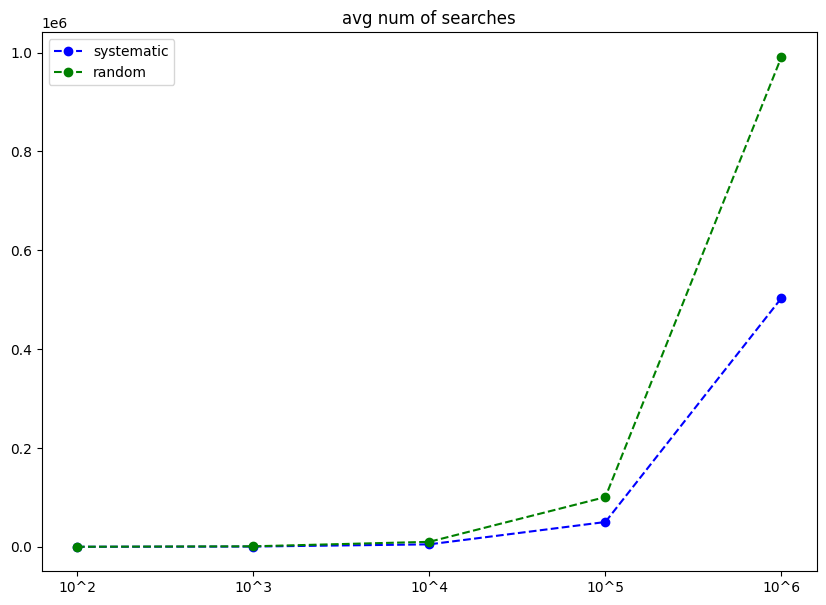

In [20]:
fig = plt.figure(figsize =(10, 7))
x_ticks_locations =[0,1,2,3,4]
x_ticks_labels = ['10^2', '10^3', '10^4', '10^5','10^6']
plt.xticks(ticks=x_ticks_locations, labels=x_ticks_labels)
plt.title("avg num of searches")
plt.plot(means,'--bo',label='systematic')
plt.plot(meanr,'--go',label='random')
plt.legend()



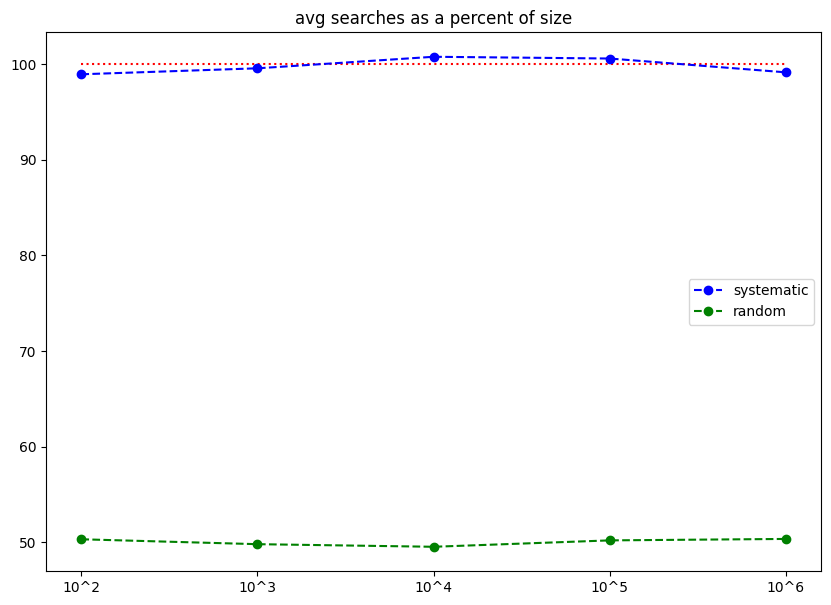

In [25]:
fig = plt.figure(figsize =(10, 7))
x_ticks_locations =[0,1,2,3,4]
x_ticks_labels = ['10^2', '10^3', '10^4', '10^5','10^6']
plt.xticks(ticks=x_ticks_locations, labels=x_ticks_labels)
plt.title("avg searches as a percent of size")
plt.plot([100,100,100,100,100],'red',linestyle=':')
plt.plot(meanr_100,'--bo',label='systematic')
plt.plot(means_100,'--go',label='random')
plt.legend()


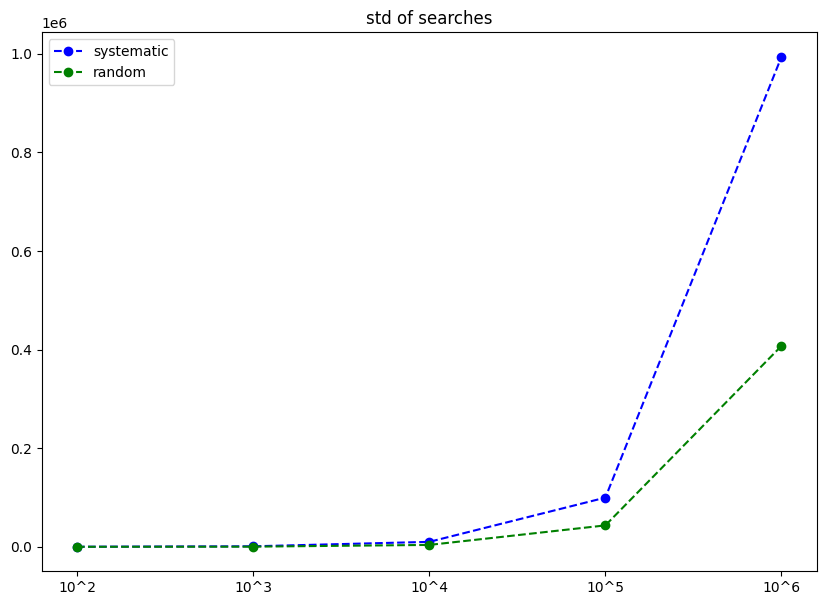

In [27]:
fig = plt.figure(figsize =(10, 7))
x_ticks_locations =[0,1,2,3,4]
x_ticks_labels = ['10^2', '10^3', '10^4', '10^5','10^6']
plt.xticks(ticks=x_ticks_locations, labels=x_ticks_labels)
plt.title("standard deviation of searches")
plt.plot(std_r,'--bo',label='systematic')
plt.plot(std_s,'--go',label='random')
plt.legend()


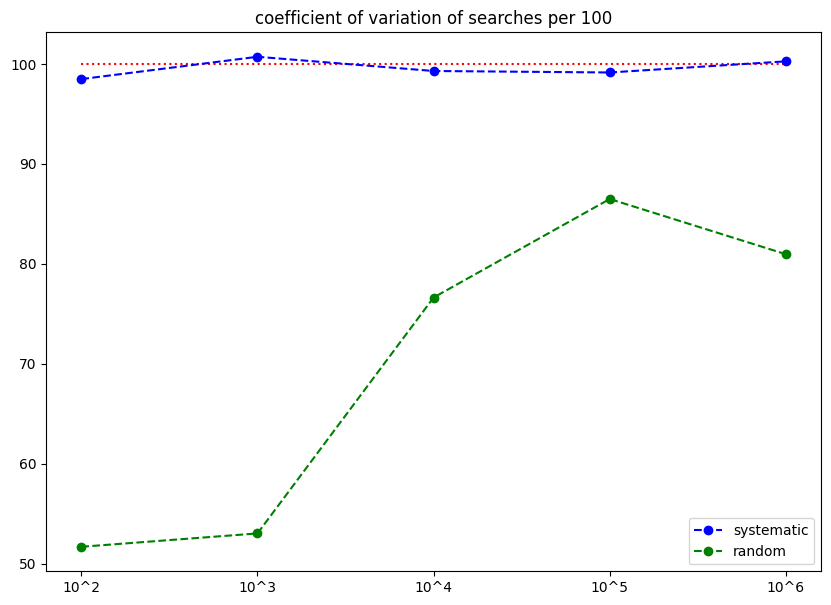

In [30]:
fig = plt.figure(figsize =(10, 7))
x_ticks_locations =[0,1,2,3,4]
x_ticks_labels = ['10^2', '10^3', '10^4', '10^5','10^6']
plt.xticks(ticks=x_ticks_locations, labels=x_ticks_labels)
plt.title("coefficient of variation of searches per 100")
plt.plot([100,100,100,100,100],'red',linestyle=':')
plt.plot(cv_r,'--bo',label='systematic')
plt.plot(cv_s,'--go',label='random')
plt.legend()
